In [ ]:
import pandas as pd
import numpy as np
import cv2
from PIL import Image, ImageFilter 
from numpy import asarray

In [ ]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import time as t
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as mt
import datetime as d
from skimage.io import imread, imshow
from skimage.measure import label, regionprops, regionprops_table
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
p = {
        "area_sum":[],"convex_area_sum":[],"bbox_area_sum":[],
      "extent_sum":[],"solidity_sum":[],"eccentricity_sum":[],
      "orientation_sum":[]
     }

In [ ]:
p1 = {
      "area_sum":[],"convex_area_sum":[],"bbox_area_sum":[],
      "extent_sum":[],"solidity_sum":[],"eccentricity_sum":[],
      "orientation_sum":[]
     }

In [ ]:
p2 = {
            "area_sum":[],"convex_area_sum":[],"bbox_area_sum":[],
      "extent_sum":[],"solidity_sum":[],"eccentricity_sum":[],
      "orientation_sum":[]
     }

In [ ]:
p3 = {
            "area_sum":[],"convex_area_sum":[],"bbox_area_sum":[],
      "extent_sum":[],"solidity_sum":[],"eccentricity_sum":[],
      "orientation_sum":[]
     }

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter 
def load_images_from_folder(folder):
    images = []
    i=0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        gray_painting = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        (thresh, blackAndWhiteImage) = cv2.threshold(gray_painting, 127, 255, cv2.THRESH_BINARY_INV) 
        cv2.imwrite('/content/gdrive/MyDrive/numpy_binarization1.png', blackAndWhiteImage)
        binarized=imread('/content/gdrive/MyDrive/numpy_binarization1.png')
        im1 = Image.open(r'/content/gdrive/MyDrive/numpy_binarization1.png') 
        im2 = im1.filter(ImageFilter.MedianFilter(size = 3)) 
        numpydata = asarray(im2)
        label_im = label(numpydata)
        regions = regionprops(label_im)
        properties = ["area","convex_area","bbox_area", "extent", "solidity", "eccentricity", "orientation"]
        df=pd.DataFrame(regionprops_table(label_im, properties=properties))
        df=df[df['area']>1000]
        df=df[df['area']<8000]
        p['area_sum'].append(df['area'].sum())
        p['convex_area_sum'].append(df['convex_area'].sum())
        p['bbox_area_sum'].append(df['bbox_area'].sum())
        p['extent_sum'].append(df['extent'].sum())
        p['solidity_sum'].append(df['solidity'].sum())
        p['eccentricity_sum'].append(df['eccentricity'].sum())
        p['orientation_sum'].append(df['orientation'].sum())
        




In [ ]:
load_images_from_folder('/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Benign')
df1=pd.DataFrame(p)
df1['label']='Benign'

In [ ]:
df1

,area_sum,convex_area_sum,bbox_area_sum,extent_sum,solidity_sum,eccentricity_sum,orientation_sum,label
0,8056,12913,24490,2.351315,3.967752,5.168015,-2.957377,Benign
1,0,0,0,0.000000,0.000000,0.000000,0.000000,Benign
2,42326,72657,116733,6.518986,10.060141,14.293964,-1.312254,Benign
3,0,0,0,0.000000,0.000000,0.000000,0.000000,Benign
4,1181,1906,2950,0.400339,0.619622,0.688243,0.398375,Benign
...,...,...,...,...,...,...,...,...
383,39029,69572,130249,4.250864,7.116404,9.366848,-5.904389,Benign
384,10687,13563,19755,1.483113,2.290833,2.772270,0.445958,Benign
385,7585,11723,19491,1.598245,2.679035,3.459306,-4.559435,Benign
386,1245,1413,2156,0.577458,0.881104,0.740596,1.082744,Benign


In [ ]:
df1.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


area_sum            12902.858247
convex_area_sum     20975.097938
bbox_area_sum       35073.608247
extent_sum              2.455150
solidity_sum            3.846764
eccentricity_sum        4.816896
orientation_sum        -0.482286
dtype: float64

In [ ]:
df1.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


area_sum            14631.714682
convex_area_sum     24065.409957
bbox_area_sum       40901.912120
extent_sum              2.581173
solidity_sum            3.975528
eccentricity_sum        4.918848
orientation_sum         3.115426
dtype: float64

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter 
def load_images_from_folder(folder):
    images = []
    i=0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        gray_painting = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        (thresh, blackAndWhiteImage) = cv2.threshold(gray_painting, 127, 255, cv2.THRESH_BINARY_INV) 
        cv2.imwrite('/content/gdrive/MyDrive/numpy_binarization1.png', blackAndWhiteImage)
        binarized=imread('/content/gdrive/MyDrive/numpy_binarization1.png')
        im1 = Image.open(r'/content/gdrive/MyDrive/numpy_binarization1.png') 
        im2 = im1.filter(ImageFilter.MedianFilter(size = 3)) 
        numpydata = asarray(im2)
        label_im = label(numpydata)
        regions = regionprops(label_im)
        properties = ["area","convex_area","bbox_area", "extent", "solidity", "eccentricity", "orientation"]
        df=pd.DataFrame(regionprops_table(label_im, properties=properties))
        df=df[df['area']>1000]
        df=df[df['area']<8000]
        p1['area_sum'].append(df['area'].sum())
        p1['convex_area_sum'].append(df['convex_area'].sum())
        p1['bbox_area_sum'].append(df['bbox_area'].sum())
        p1['extent_sum'].append(df['extent'].sum())
        p1['solidity_sum'].append(df['solidity'].sum())
        p1['eccentricity_sum'].append(df['eccentricity'].sum())
        p1['orientation_sum'].append(df['orientation'].sum())

In [ ]:
load_images_from_folder('/content/gdrive/MyDrive/Breast Cancer DataSet/Train/Malignant')
df2=pd.DataFrame(p1)
df2['label']='Malignant'

In [ ]:
df2

,area_sum,convex_area_sum,bbox_area_sum,extent_sum,solidity_sum,eccentricity_sum,orientation_sum,label
0,34701,55221,81915,9.528217,13.620742,15.158442,-1.374574,Malignant
1,18767,23807,36598,6.763479,9.845817,9.207437,-7.711092,Malignant
2,15821,28791,46945,3.428025,4.908466,5.975439,1.899875,Malignant
3,42902,63561,100063,6.843724,10.461863,13.115807,-0.003669,Malignant
4,1033,1582,2340,0.441453,0.652971,0.966994,-0.121376,Malignant
...,...,...,...,...,...,...,...,...
417,35989,57458,86818,7.558766,11.217554,15.038537,-0.502834,Malignant
418,2449,3332,4860,1.034844,1.514000,1.765594,-0.369559,Malignant
419,42138,61089,91390,10.213970,14.730184,16.878196,-7.406711,Malignant
420,42381,63299,91775,9.026271,12.726215,13.811006,-6.282314,Malignant


In [ ]:
df2=df2.dropna()

In [ ]:
train = df1.merge(df2, how = 'outer')

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter 
def load_images_from_folder(folder):
    images = []
    i=0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        gray_painting = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        (thresh, blackAndWhiteImage) = cv2.threshold(gray_painting, 127, 255, cv2.THRESH_BINARY_INV) 
        cv2.imwrite('/content/gdrive/MyDrive/numpy_binarization1.png', blackAndWhiteImage)
        binarized=imread('/content/gdrive/MyDrive/numpy_binarization1.png')
        im1 = Image.open(r'/content/gdrive/MyDrive/numpy_binarization1.png') 
        im2 = im1.filter(ImageFilter.MedianFilter(size = 3)) 
        numpydata = asarray(im2)
        label_im = label(numpydata)
        regions = regionprops(label_im)
        properties = ["area","convex_area","bbox_area", "extent", "solidity", "eccentricity", "orientation"]
        df=pd.DataFrame(regionprops_table(label_im, properties=properties))
        df=df[df['area']>1000]
        df=df[df['area']<8000]
        p2['area_sum'].append(df['area'].sum())
        p2['convex_area_sum'].append(df['convex_area'].sum())
        p2['bbox_area_sum'].append(df['bbox_area'].sum())
        p2['extent_sum'].append(df['extent'].sum())
        p2['solidity_sum'].append(df['solidity'].sum())
        p2['eccentricity_sum'].append(df['eccentricity'].sum())
        p2['orientation_sum'].append(df['orientation'].sum())

In [ ]:
load_images_from_folder('/content/gdrive/MyDrive/Breast Cancer DataSet/Test/Benign')
df3=pd.DataFrame(p2)
df3['label']='Benign'

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter 
def load_images_from_folder(folder):
    images = []
    i=0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
        gray_painting = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        (thresh, blackAndWhiteImage) = cv2.threshold(gray_painting, 127, 255, cv2.THRESH_BINARY_INV) 
        cv2.imwrite('/content/gdrive/MyDrive/numpy_binarization1.png', blackAndWhiteImage)
        binarized=imread('/content/gdrive/MyDrive/numpy_binarization1.png')
        im1 = Image.open(r'/content/gdrive/MyDrive/numpy_binarization1.png') 
        im2 = im1.filter(ImageFilter.MedianFilter(size = 3)) 
        numpydata = asarray(im2)
        label_im = label(numpydata)
        regions = regionprops(label_im)
        properties = ["area","convex_area","bbox_area", "extent", "solidity", "eccentricity", "orientation"]
        df=pd.DataFrame(regionprops_table(label_im, properties=properties))
        df=df[df['area']>1000]
        df=df[df['area']<8000]
        p3['area_sum'].append(df['area'].sum())
        p3['convex_area_sum'].append(df['convex_area'].sum())
        p3['bbox_area_sum'].append(df['bbox_area'].sum())
        p3['extent_sum'].append(df['extent'].sum())
        p3['solidity_sum'].append(df['solidity'].sum())
        p3['eccentricity_sum'].append(df['eccentricity'].sum())
        p3['orientation_sum'].append(df['orientation'].sum())

In [ ]:
load_images_from_folder('/content/gdrive/MyDrive/Breast Cancer DataSet/Test/Malignant')
df4=pd.DataFrame(p3)
df4['label']='Malignant'

In [ ]:
test = df3.merge(df4, how = 'outer')

In [ ]:
train=train.dropna()

In [ ]:
test=test.dropna()

In [ ]:
X_train=train[['area_sum','convex_area_sum','bbox_area_sum','extent_sum','solidity_sum','eccentricity_sum','orientation_sum']]
y_train=train['label']

In [ ]:
X_test=test[['area_sum','convex_area_sum','bbox_area_sum','extent_sum','solidity_sum','eccentricity_sum','orientation_sum']]
y_test=test['label']

In [ ]:
X_train_min=X_train.min()
X_train_min

area_sum             0.000000
convex_area_sum      0.000000
bbox_area_sum        0.000000
extent_sum           0.000000
solidity_sum         0.000000
eccentricity_sum     0.000000
orientation_sum    -19.764785
dtype: float64

In [ ]:
X_train_max=X_train.max()
X_train_max

area_sum             92194.000000
convex_area_sum     189486.000000
bbox_area_sum       350817.000000
extent_sum              18.792698
solidity_sum            27.125227
eccentricity_sum        30.281836
orientation_sum         12.614930
dtype: float64

In [ ]:
X_train_range=(X_train_max- X_train_min)
X_train_range

area_sum             92194.000000
convex_area_sum     189486.000000
bbox_area_sum       350817.000000
extent_sum              18.792698
solidity_sum            27.125227
eccentricity_sum        30.281836
orientation_sum         32.379715
dtype: float64

In [ ]:
X_train_scaled=(X_train- X_train_min)/X_train_range
X_train_scaled

,area_sum,convex_area_sum,bbox_area_sum,extent_sum,solidity_sum,eccentricity_sum,orientation_sum
0,0.087381,0.068148,0.069808,0.125119,0.146275,0.170664,0.519072
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610406
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610406
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610406
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.610406
...,...,...,...,...,...,...,...
805,0.390362,0.303231,0.247474,0.402218,0.413547,0.496619,0.594877
806,0.026564,0.017584,0.013853,0.055066,0.055815,0.058305,0.598993
807,0.457058,0.322393,0.260506,0.543507,0.543044,0.557370,0.381661
808,0.459694,0.334056,0.261604,0.480307,0.469165,0.456082,0.416386


In [ ]:
X_test_min=X_test.min()
X_test_min

area_sum             0.000000
convex_area_sum      0.000000
bbox_area_sum        0.000000
extent_sum           0.000000
solidity_sum         0.000000
eccentricity_sum     0.000000
orientation_sum    -13.088819
dtype: float64

In [ ]:

X_test_max=X_test.max()
X_test_max

area_sum             89316.000000
convex_area_sum     157578.000000
bbox_area_sum       256718.000000
extent_sum              20.038149
solidity_sum            28.417768
eccentricity_sum        25.928453
orientation_sum         11.400323
dtype: float64

In [ ]:
X_test_range=(X_test_max- X_test_min)
X_test_range

area_sum             89316.000000
convex_area_sum     157578.000000
bbox_area_sum       256718.000000
extent_sum              20.038149
solidity_sum            28.417768
eccentricity_sum        25.928453
orientation_sum         24.489141
dtype: float64

In [ ]:
X_test_scaled=(X_test- X_test_min)/X_test_range
X_test_scaled.head()

,area_sum,convex_area_sum,bbox_area_sum,extent_sum,solidity_sum,eccentricity_sum,orientation_sum
0,0.291090,0.273204,0.291951,0.305037,0.364185,0.503647,0.319060
1,0.219065,0.189512,0.179395,0.190480,0.199088,0.252766,0.603522
2,0.389684,0.313965,0.317037,0.330413,0.363008,0.465133,0.475188
3,0.365030,0.290986,0.308876,0.386422,0.424833,0.507624,0.526008
4,0.304201,0.402747,0.430916,0.167662,0.192640,0.298525,0.356336


without normalization

In [ ]:
#SVM
start=d.datetime.now()
svm = SVC()
svm.fit(X_train, y_train)
pred = svm.predict(X_test)
print('Elapsed time: ',str(d.datetime.now()-start))
print('Accracy score:',mt.accuracy_score(y_test, pred))

Elapsed time:  0:00:00.048607
Accracy score: 0.5348837209302325


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Benign       0.56      0.28      0.38        64
   Malignant       0.53      0.78      0.63        65

    accuracy                           0.53       129
   macro avg       0.54      0.53      0.50       129
weighted avg       0.54      0.53      0.50       129



In [ ]:
start=d.datetime.now()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
print('Elapsed time: ',str(d.datetime.now()-start))
print('Accracy score:',mt.accuracy_score(y_test, pred))

Elapsed time:  0:00:00.014613
Accracy score: 0.5581395348837209


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Benign       0.56      0.50      0.53        64
   Malignant       0.56      0.62      0.58        65

    accuracy                           0.56       129
   macro avg       0.56      0.56      0.56       129
weighted avg       0.56      0.56      0.56       129



In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train, y_train)
print('Model test Score: %.3f, ' %clf.score(X_test, y_test),
      'Model training Score: %.3f' %clf.score(X_train, y_train))

Model test Score: 0.543,  Model training Score: 0.756


In [ ]:
pred=clf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      Benign       0.57      0.33      0.42        64
   Malignant       0.53      0.75      0.62        65

    accuracy                           0.54       129
   macro avg       0.55      0.54      0.52       129
weighted avg       0.55      0.54      0.52       129



In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb  =  nb.predict(X_test)
ac = mt.accuracy_score(y_test,y_pred_nb)
ac

0.6666666666666666

In [ ]:
pipeline = make_pipeline(StandardScaler(),
                        KNeighborsClassifier())
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=0.5,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train, y_train)
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

Model test Score: 0.527,  Model training Score: 0.688


In [ ]:
bgclassifier = BaggingClassifier(base_estimator=LogisticRegression(random_state=1), n_estimators=100,
                                 max_features=0.5,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train, y_train)
print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

Model test Score: 0.496,  Model training Score: 0.656


with normalized data

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
pipeline = make_pipeline(StandardScaler(),
                        KNeighborsClassifier())
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=0.5,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train_scaled, y_train)
print('Model test Score: %.3f, ' %bgclassifier.score(X_test_scaled, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train_scaled, y_train))

Model test Score: 0.581,  Model training Score: 0.688


In [ ]:
bgclassifier = BaggingClassifier(base_estimator=LogisticRegression(random_state=1), n_estimators=100,
                                 max_features=0.5,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)
bgclassifier.fit(X_train_scaled, y_train)
print('Model test Score: %.3f, ' %bgclassifier.score(X_test_scaled, y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train_scaled, y_train))

Model test Score: 0.566,  Model training Score: 0.643


In [ ]:
#SVM
start=d.datetime.now()
svm = SVC()
svm.fit(X_train_scaled, y_train)
pred = svm.predict(X_test_scaled)
print('Elapsed time: ',str(d.datetime.now()-start))
print('Accracy score:',mt.accuracy_score(y_test, pred))

Elapsed time:  0:00:00.049921
Accracy score: 0.6046511627906976


In [ ]:
start=d.datetime.now()
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)
pred = dt.predict(X_test_scaled)
print('Elapsed time: ',str(d.datetime.now()-start))
print('Accracy score:',mt.accuracy_score(y_test, pred))

Elapsed time:  0:00:00.019679
Accracy score: 0.6356589147286822


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X_train_scaled, y_train)
print('Model test Score: %.3f, ' %clf.score(X_test_scaled, y_test),
      'Model training Score: %.3f' %clf.score(X_train_scaled, y_train))

Model test Score: 0.620,  Model training Score: 0.756


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train_s, y_train)
y_pred_nb  =  classifier_nb.predict(X_test_s)
ac = mt.accuracy_score(y_test,y_pred_nb)
ac

0.6666666666666666

In [ ]:
import seaborn as sns

In [ ]:
train.columns

Index(['area_sum', 'convex_area_sum', 'bbox_area_sum', 'extent_sum',
       'solidity_sum', 'eccentricity_sum', 'orientation_sum', 'label'],
      dtype='object')

In [ ]:
def plot(y):
  sns.kdeplot(data=train, x=y, hue="label")

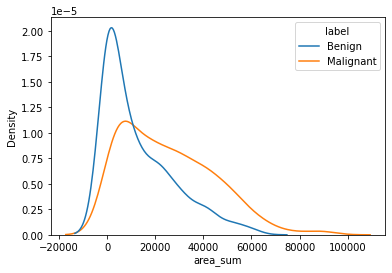

In [ ]:
plot("area_sum")

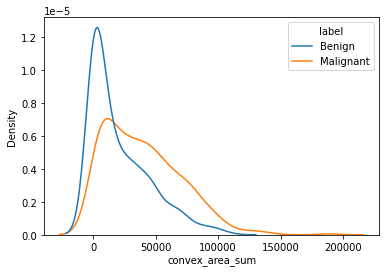

In [ ]:
plot("convex_area_sum")

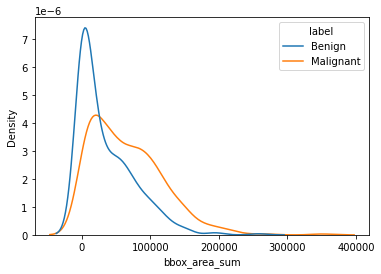

In [ ]:
plot('bbox_area_sum')

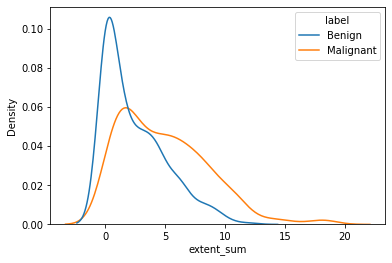

In [ ]:
plot('extent_sum')

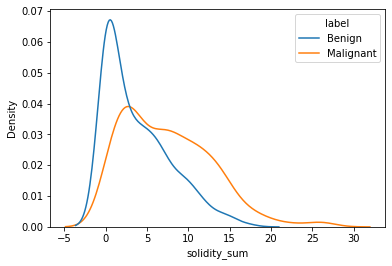

In [ ]:
plot('solidity_sum')

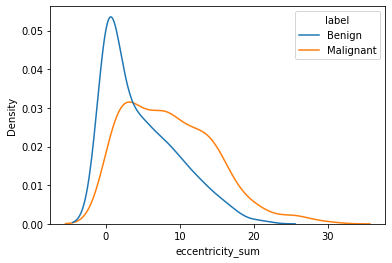

In [ ]:
plot('eccentricity_sum')

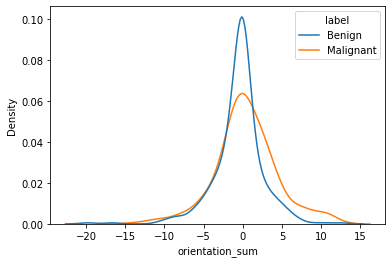

In [ ]:
plot('orientation_sum')